In [2]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
# import dataset
df = pd.read_csv(r'C:\Users\Nimisha Mathew\Desktop\Assignments\Project_Churn_Model.csv')

In [27]:
df.head()

,Agency,Commendation or Complaint,Subject Matter,Subject Detail,Issue Detail,Year,Quarter,Branch/Line/Route
0,Long Island Rail Road,Commendation,Employees,CSR - Ambassador,Very Helpful/Friendly,2015,2,No Value
1,Long Island Rail Road,Commendation,Employees,CSR - Ambassador,Very Helpful/Friendly,2015,2,Port Jefferson
2,Long Island Rail Road,Commendation,Employees,CSR - Customer Service Office,NaN,2015,1,No Value
3,Long Island Rail Road,Commendation,Employees,CSR - Customer Service Office,Other,2015,2,Far Rockaway
4,Long Island Rail Road,Commendation,Employees,CSR - Customer Service Office,Very Helpful / Friendly,2015,2,No Value


In [6]:
df.shape

(183887, 8)

In [7]:
df.dtypes

Agency                       object
Commendation or Complaint    object
Subject Matter               object
Subject Detail               object
Issue Detail                 object
Year                          int64
Quarter                       int64
Branch/Line/Route            object
dtype: object

Text(0.5, 1.02, 'Count of target variable per category')

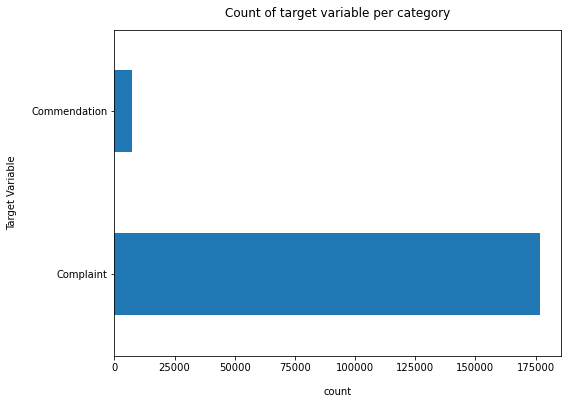

In [8]:
df['Commendation or Complaint'].value_counts().plot(kind='barh', figsize=(8,6))
plt.xlabel("count", labelpad = 14)
plt.ylabel("Target Variable", labelpad =14)
plt.title("Count of target variable per category", y=1.02)

In [10]:
df['Commendation or Complaint'].value_counts()

Complaint       176693
Commendation      7194
Name: Commendation or Complaint, dtype: int64

In [9]:
100*df['Commendation or Complaint'].value_counts()/len(df['Commendation or Complaint'])

Complaint       96.087815
Commendation     3.912185
Name: Commendation or Complaint, dtype: float64

* Data is highly imbalanced, ratio = 96:4<br>
* So we analyse the data with other features while taking the target values separately to get some insights.

In [12]:
df.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183887 entries, 0 to 183886
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Agency                     183887 non-null  object
 1   Commendation or Complaint  183887 non-null  object
 2   Subject Matter             183887 non-null  object
 3   Subject Detail             183887 non-null  object
 4   Issue Detail               173753 non-null  object
 5   Year                       183887 non-null  int64 
 6   Quarter                    183887 non-null  int64 
 7   Branch/Line/Route          183887 non-null  object
dtypes: int64(2), object(6)
memory usage: 11.2+ MB


## Missing Values 

In [16]:
import warnings
warnings.filterwarnings("ignore")

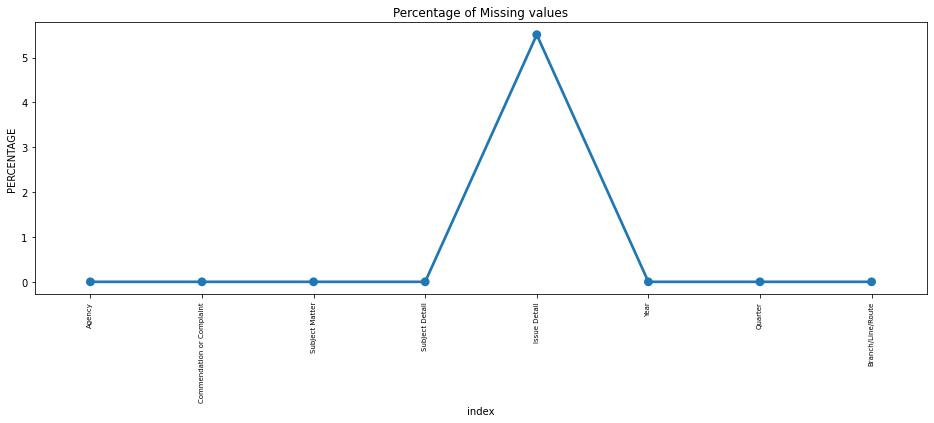

In [17]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()


In [15]:
df.isnull().sum()

Agency                           0
Commendation or Complaint        0
Subject Matter                   0
Subject Detail                   0
Issue Detail                 10134
Year                             0
Quarter                          0
Branch/Line/Route                0
dtype: int64

## Data Cleaning

In [20]:
100*df['Issue Detail'].isnull().sum()/len(df['Issue Detail'])

5.510993164280237

<b>5.5% missing values in entire data.
Since the missing value is from a categorical variable let us replace the missing values with mode.

In [21]:
df.loc[df['Issue Detail'].isnull() == True]

,Agency,Commendation or Complaint,Subject Matter,Subject Detail,Issue Detail,Year,Quarter,Branch/Line/Route
2,Long Island Rail Road,Commendation,Employees,CSR - Customer Service Office,NaN,2015,1,No Value
12,Long Island Rail Road,Commendation,Employees,Lost & Found Agent,NaN,2015,1,No Value
24,Long Island Rail Road,Commendation,Employees,No Value,NaN,2014,3,No Value
25,Long Island Rail Road,Commendation,Employees,No Value,NaN,2015,2,No Value
26,Long Island Rail Road,Commendation,Employees,No Value,NaN,2015,1,No Value
...,...,...,...,...,...,...,...,...
180145,Subways,Complaint,Trains,Rail / Subway Cars,NaN,2017,4,5
181346,Subways,Complaint,Travel Disruption / Trip Problem,No Value,NaN,2017,4,No Value
181347,Subways,Complaint,Travel Disruption / Trip Problem,No Value,NaN,2017,4,No Value
181348,Subways,Complaint,Travel Disruption / Trip Problem,No Value,NaN,2017,4,N


In [90]:
df1 = df.copy()

### Missing Value Treatment

<U><b>Dealing with missing values corresponding to 'Commendation'.

In [88]:
df2=df.loc[df['Commendation or Complaint']== 'Commendation']
df2

,Agency,Commendation or Complaint,Subject Matter,Subject Detail,Issue Detail,Year,Quarter,Branch/Line/Route
0,Long Island Rail Road,Commendation,Employees,CSR - Ambassador,Very Helpful/Friendly,2015,2,No Value
1,Long Island Rail Road,Commendation,Employees,CSR - Ambassador,Very Helpful/Friendly,2015,2,Port Jefferson
2,Long Island Rail Road,Commendation,Employees,CSR - Customer Service Office,NaN,2015,1,No Value
3,Long Island Rail Road,Commendation,Employees,CSR - Customer Service Office,Other,2015,2,Far Rockaway
4,Long Island Rail Road,Commendation,Employees,CSR - Customer Service Office,Very Helpful / Friendly,2015,2,No Value
...,...,...,...,...,...,...,...,...
172525,Subways,Commendation,Trains,Rail / Subway Cars,Other,2017,4,No Value
172526,Subways,Commendation,Trains,Rail / Subway Cars,Other,2017,4,No Value
172527,Subways,Commendation,Trains,Rail / Subway Cars,Other,2017,4,No Value
172528,Subways,Commendation,Travel Disruption / Trip Problem,Train - General,Other,2017,4,S (42nd Street)


In [92]:
df2['Issue Detail']=df2['Issue Detail'].fillna(df2['Issue Detail'].mode()[0])

In [93]:
df2.head()

,Agency,Commendation or Complaint,Subject Matter,Subject Detail,Issue Detail,Year,Quarter,Branch/Line/Route
0,Long Island Rail Road,Commendation,Employees,CSR - Ambassador,Very Helpful/Friendly,2015,2,No Value
1,Long Island Rail Road,Commendation,Employees,CSR - Ambassador,Very Helpful/Friendly,2015,2,Port Jefferson
2,Long Island Rail Road,Commendation,Employees,CSR - Customer Service Office,Very Helpful / Friendly,2015,1,No Value
3,Long Island Rail Road,Commendation,Employees,CSR - Customer Service Office,Other,2015,2,Far Rockaway
4,Long Island Rail Road,Commendation,Employees,CSR - Customer Service Office,Very Helpful / Friendly,2015,2,No Value


<U><b>Dealing with missing values corresponding to 'Complaint'.

In [94]:
df3=df.loc[df['Commendation or Complaint']== 'Complaint']
df3

,Agency,Commendation or Complaint,Subject Matter,Subject Detail,Issue Detail,Year,Quarter,Branch/Line/Route
109,NYC Buses,Complaint,Buses,No Value,NaN,2015,1,B70
155,Long Island Rail Road,Complaint,Buses,Bus / Vehicle - General,Other,2015,1,No Value
156,Long Island Rail Road,Complaint,Buses,Bus / Vehicle - General,Other,2015,2,No Value
157,Long Island Rail Road,Complaint,Buses,No Value,NaN,2015,1,No Value
158,Long Island Rail Road,Complaint,Customer,No Value,NaN,2015,1,Hempstead
...,...,...,...,...,...,...,...,...
183882,Subways,Complaint,Travel Disruption / Trip Problem,Website,No Announcement / Messages - Visual/Text,2017,4,C
183883,Subways,Complaint,Travel Disruption / Trip Problem,Website,No Announcement / Messages - Visual/Text,2017,4,No Value
183884,Subways,Complaint,Travel Disruption / Trip Problem,Website,No Announcement / Messages - Visual/Text,2017,4,N
183885,Subways,Complaint,Travel Disruption / Trip Problem,Website,Timeliness - Visual / Text,2017,4,7


In [95]:
df3['Issue Detail']=df3['Issue Detail'].fillna(df3['Issue Detail'].mode()[0])

In [96]:
df3.head()

,Agency,Commendation or Complaint,Subject Matter,Subject Detail,Issue Detail,Year,Quarter,Branch/Line/Route
109,NYC Buses,Complaint,Buses,No Value,Late / Delay,2015,1,B70
155,Long Island Rail Road,Complaint,Buses,Bus / Vehicle - General,Other,2015,1,No Value
156,Long Island Rail Road,Complaint,Buses,Bus / Vehicle - General,Other,2015,2,No Value
157,Long Island Rail Road,Complaint,Buses,No Value,Late / Delay,2015,1,No Value
158,Long Island Rail Road,Complaint,Customer,No Value,Late / Delay,2015,1,Hempstead


<b><u> Combining two Data frames.

In [129]:
frames =[df2,df3]
DF = pd.concat(frames)
DF

,Agency,Commendation or Complaint,Subject Matter,Subject Detail,Issue Detail,Year,Quarter,Branch/Line/Route
0,Long Island Rail Road,Commendation,Employees,CSR - Ambassador,Very Helpful/Friendly,2015,2,No Value
1,Long Island Rail Road,Commendation,Employees,CSR - Ambassador,Very Helpful/Friendly,2015,2,Port Jefferson
2,Long Island Rail Road,Commendation,Employees,CSR - Customer Service Office,Very Helpful / Friendly,2015,1,No Value
3,Long Island Rail Road,Commendation,Employees,CSR - Customer Service Office,Other,2015,2,Far Rockaway
4,Long Island Rail Road,Commendation,Employees,CSR - Customer Service Office,Very Helpful / Friendly,2015,2,No Value
...,...,...,...,...,...,...,...,...
183882,Subways,Complaint,Travel Disruption / Trip Problem,Website,No Announcement / Messages - Visual/Text,2017,4,C
183883,Subways,Complaint,Travel Disruption / Trip Problem,Website,No Announcement / Messages - Visual/Text,2017,4,No Value
183884,Subways,Complaint,Travel Disruption / Trip Problem,Website,No Announcement / Messages - Visual/Text,2017,4,N
183885,Subways,Complaint,Travel Disruption / Trip Problem,Website,Timeliness - Visual / Text,2017,4,7


In [102]:
DF.isnull().sum()

Agency                       0
Commendation or Complaint    0
Subject Matter               0
Subject Detail               0
Issue Detail                 0
Year                         0
Quarter                      0
Branch/Line/Route            0
dtype: int64

In [130]:
DF1=DF.sort_index()

## Data Exploration

### Univariate Analysis

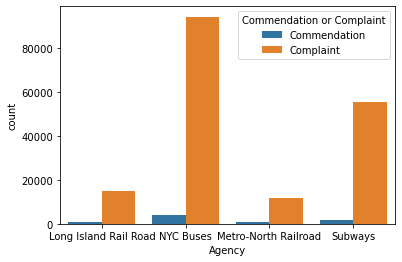

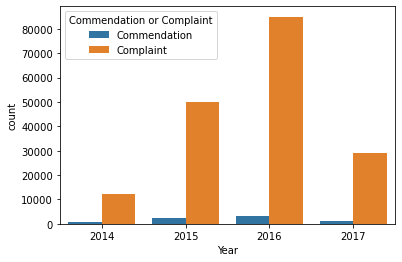

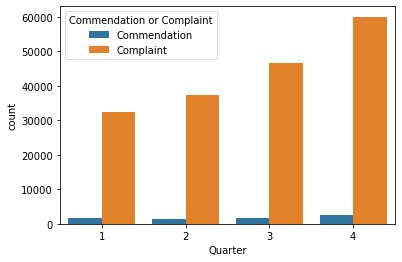

In [112]:
for i, predictor in enumerate(DF1.drop(columns=['Commendation or Complaint', 'Branch/Line/Route', 'Issue Detail', 'Subject Detail','Subject Matter'])):
    plt.figure(i)
    sns.countplot(data=DF1, x=predictor, hue='Commendation or Complaint')

In [131]:
DF1= DF1.rename(columns={'Commendation or Complaint' : 'Churn'})

In [132]:
DF1

,Agency,Churn,Subject Matter,Subject Detail,Issue Detail,Year,Quarter,Branch/Line/Route
0,Long Island Rail Road,Commendation,Employees,CSR - Ambassador,Very Helpful/Friendly,2015,2,No Value
1,Long Island Rail Road,Commendation,Employees,CSR - Ambassador,Very Helpful/Friendly,2015,2,Port Jefferson
2,Long Island Rail Road,Commendation,Employees,CSR - Customer Service Office,Very Helpful / Friendly,2015,1,No Value
3,Long Island Rail Road,Commendation,Employees,CSR - Customer Service Office,Other,2015,2,Far Rockaway
4,Long Island Rail Road,Commendation,Employees,CSR - Customer Service Office,Very Helpful / Friendly,2015,2,No Value
...,...,...,...,...,...,...,...,...
183882,Subways,Complaint,Travel Disruption / Trip Problem,Website,No Announcement / Messages - Visual/Text,2017,4,C
183883,Subways,Complaint,Travel Disruption / Trip Problem,Website,No Announcement / Messages - Visual/Text,2017,4,No Value
183884,Subways,Complaint,Travel Disruption / Trip Problem,Website,No Announcement / Messages - Visual/Text,2017,4,N
183885,Subways,Complaint,Travel Disruption / Trip Problem,Website,Timeliness - Visual / Text,2017,4,7


In [133]:
DF1['Churn']=np.where(DF1.Churn == 'Complaint',1,0)

In [134]:
DF1.head()

,Agency,Churn,Subject Matter,Subject Detail,Issue Detail,Year,Quarter,Branch/Line/Route
0,Long Island Rail Road,0,Employees,CSR - Ambassador,Very Helpful/Friendly,2015,2,No Value
1,Long Island Rail Road,0,Employees,CSR - Ambassador,Very Helpful/Friendly,2015,2,Port Jefferson
2,Long Island Rail Road,0,Employees,CSR - Customer Service Office,Very Helpful / Friendly,2015,1,No Value
3,Long Island Rail Road,0,Employees,CSR - Customer Service Office,Other,2015,2,Far Rockaway
4,Long Island Rail Road,0,Employees,CSR - Customer Service Office,Very Helpful / Friendly,2015,2,No Value


## Bivariate Analysis

In [139]:
new_df1_target0=DF1.loc[DF1["Churn"]==0]
new_df1_target1=DF1.loc[DF1["Churn"]==1]

In [141]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

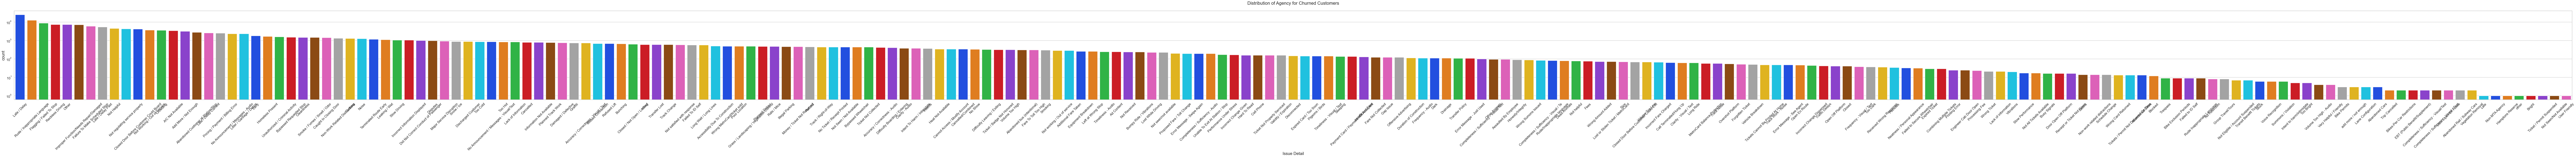

In [163]:
uniplot(new_df1_target1,col='Issue Detail',title='Distribution of Agency for Churned Customers')

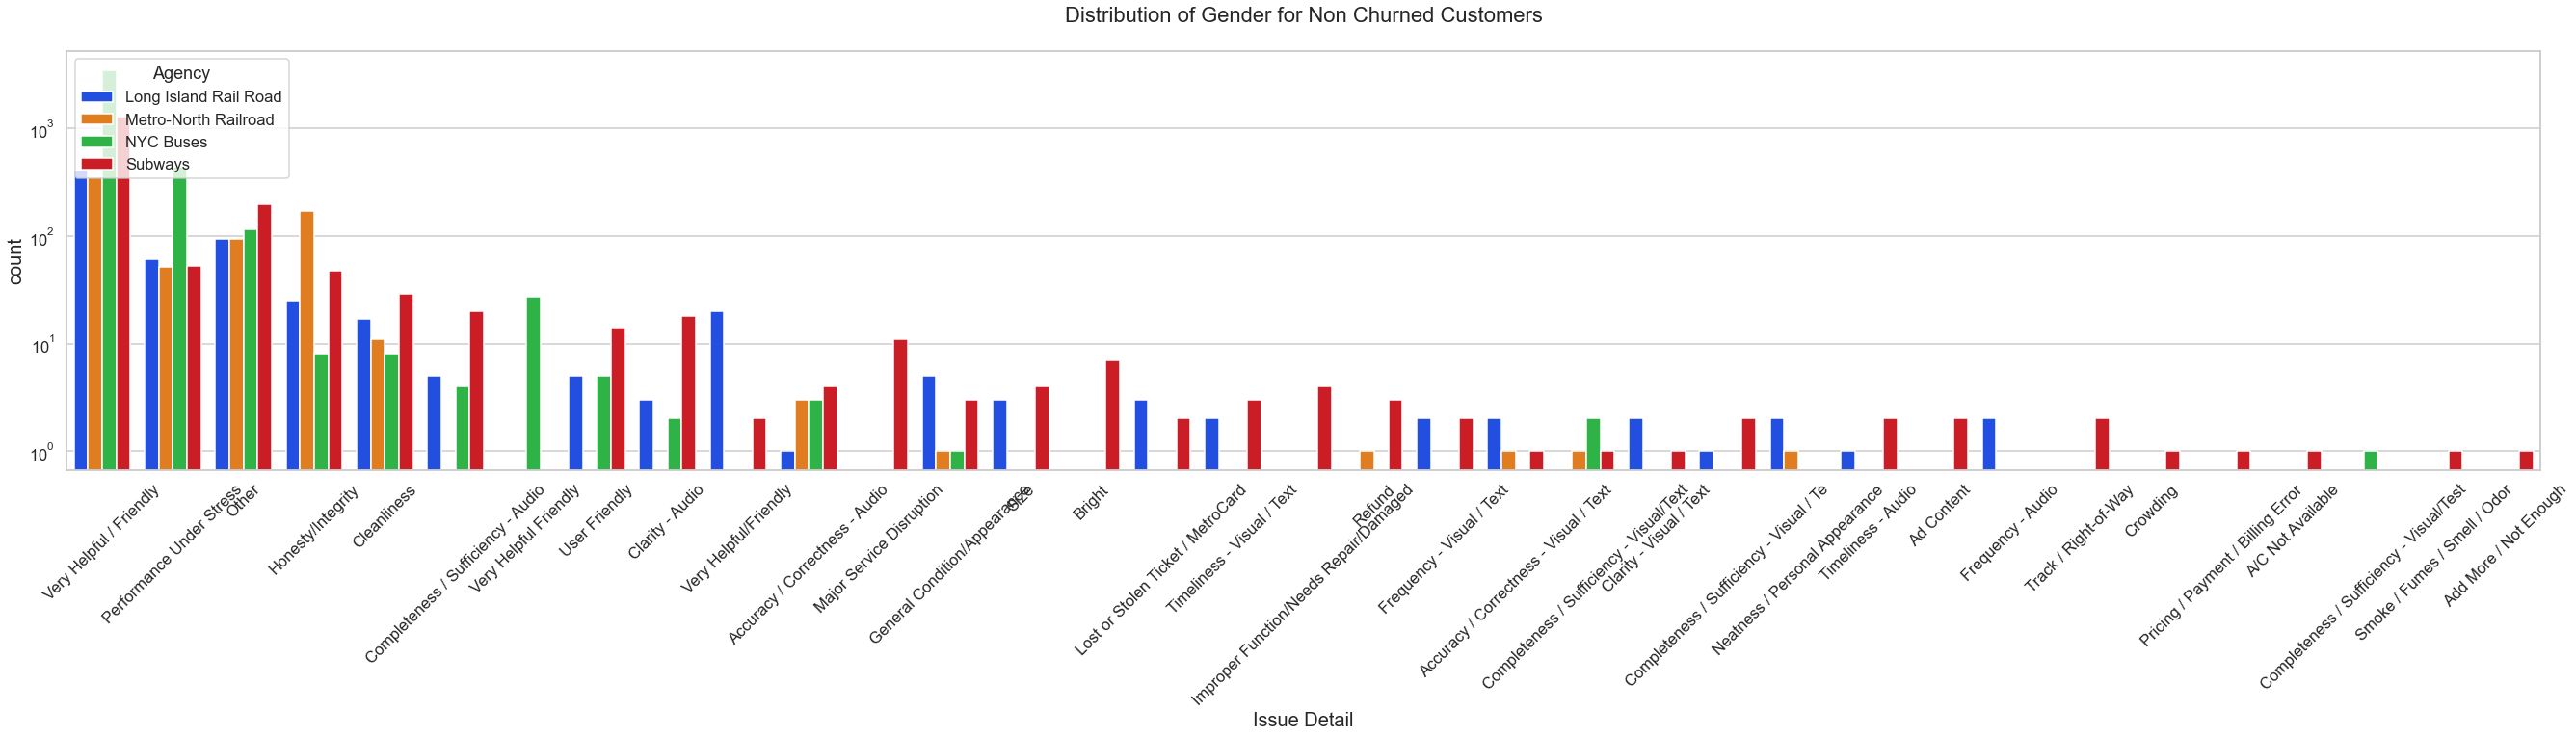

In [152]:
uniplot(new_df1_target0,col='Issue Detail',title='Distribution of Agency for Non Churned Customers',hue='Agency')

In [154]:
new_df1_target1=DF1.loc[DF1["Churn"]==1]
new_df1_target1

,Agency,Churn,Subject Matter,Subject Detail,Issue Detail,Year,Quarter,Branch/Line/Route
109,NYC Buses,1,Buses,No Value,Late / Delay,2015,1,B70
155,Long Island Rail Road,1,Buses,Bus / Vehicle - General,Other,2015,1,No Value
156,Long Island Rail Road,1,Buses,Bus / Vehicle - General,Other,2015,2,No Value
157,Long Island Rail Road,1,Buses,No Value,Late / Delay,2015,1,No Value
158,Long Island Rail Road,1,Customer,No Value,Late / Delay,2015,1,Hempstead
...,...,...,...,...,...,...,...,...
183882,Subways,1,Travel Disruption / Trip Problem,Website,No Announcement / Messages - Visual/Text,2017,4,C
183883,Subways,1,Travel Disruption / Trip Problem,Website,No Announcement / Messages - Visual/Text,2017,4,No Value
183884,Subways,1,Travel Disruption / Trip Problem,Website,No Announcement / Messages - Visual/Text,2017,4,N
183885,Subways,1,Travel Disruption / Trip Problem,Website,Timeliness - Visual / Text,2017,4,7


In [155]:
new_df1_target0=DF1.loc[DF1["Churn"]==0]
new_df1_target0

,Agency,Churn,Subject Matter,Subject Detail,Issue Detail,Year,Quarter,Branch/Line/Route
0,Long Island Rail Road,0,Employees,CSR - Ambassador,Very Helpful/Friendly,2015,2,No Value
1,Long Island Rail Road,0,Employees,CSR - Ambassador,Very Helpful/Friendly,2015,2,Port Jefferson
2,Long Island Rail Road,0,Employees,CSR - Customer Service Office,Very Helpful / Friendly,2015,1,No Value
3,Long Island Rail Road,0,Employees,CSR - Customer Service Office,Other,2015,2,Far Rockaway
4,Long Island Rail Road,0,Employees,CSR - Customer Service Office,Very Helpful / Friendly,2015,2,No Value
...,...,...,...,...,...,...,...,...
172525,Subways,0,Trains,Rail / Subway Cars,Other,2017,4,No Value
172526,Subways,0,Trains,Rail / Subway Cars,Other,2017,4,No Value
172527,Subways,0,Trains,Rail / Subway Cars,Other,2017,4,No Value
172528,Subways,0,Travel Disruption / Trip Problem,Train - General,Other,2017,4,S (42nd Street)


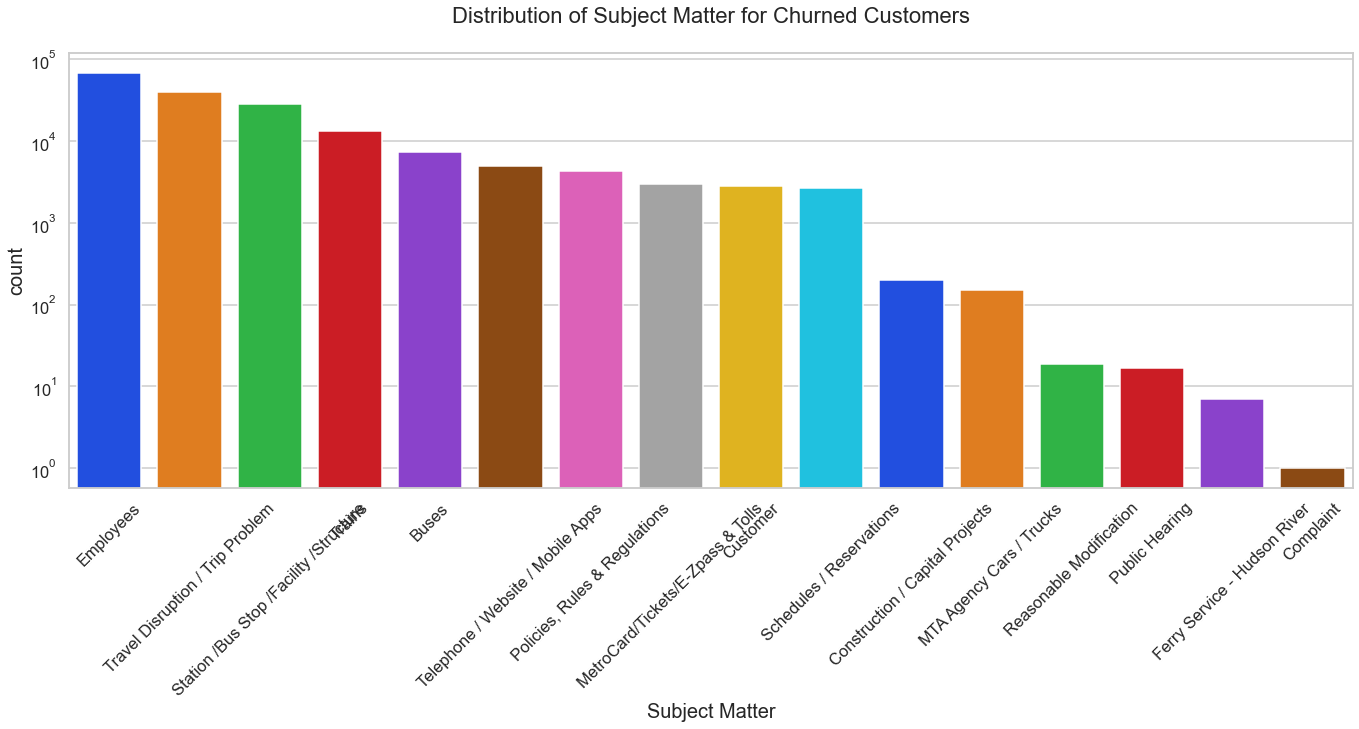

In [157]:
uniplot(new_df1_target1,col='Subject Matter',title='Distribution of Subject Matter for Churned Customers')

TypeError: Vertical orientation requires numeric `y` variable.